## DS스쿨의 데이터 분석 팀에 오신 것을 환영합니다!

(이 쥬피터 노트북은 다음의 링크 http://bit.ly/dsa-0302 데이터는 https://bit.ly/dsa-03-dsschool 에서 다운받을 수 있습니다.)

<img src="https://drive.google.com/uc?export=download&id=1ltSBZbiEzZfc3AiO4n46xNx6mkj20tUb" width="640px"/>

<center><small><a href="https://dsschool.co.kr" target="_blank">DS스쿨</a> 홈페이지</small></center>

안녕하세요! [DS스쿨](https://dsschool.co.kr) 데이터 분석팀에 오신 것을 환영합니다. [DS스쿨](https://dsschool.co.kr)은 데이터 사이언스와 데이터 마케팅과 관련된 교육을 제공하는 직무 교육 스타트업입니다. 2017년도 여름에 첫 기수를 오픈하였으며, 현재까지 빠르게 성장하고 있습니다.

오늘 이 쥬피터 노트북을 받은 수강생분들께서는 하루동안 [DS스쿨](https://dsschool.co.kr)의 일일 데이터 분석가(Data Analyst)로서 일을 할 것입니다. [DS스쿨](https://dsschool.co.kr)의 데이터베이스에서 파일을 읽어와 운영, 기획, 마케팅, 재무팀의 요청사항을 분석한 뒤, 그 결과를 전달하는 것이 오늘의 목표입니다.

[DS스쿨](https://dsschool.co.kr)의 마케팅팀은 분석 결과를 바탕으로 사용 플랫폼별 예산을 재조정할 수도 있고, 캠페인별 성과를 비교분석하여 사용자의 니즈를 파악함과 동시에 캠페인별 예산 비중을 조절할 수 있습니다. 또한, 재무팀은 분석 결과를 바탕으로 매출을 예측할 수 있고 이를 바탕으로 예산안을 작성할 수도 있습니다.

반면 데이터 분석가(Data Analyst)가 정확한 분석 결과를 전달해주지 못한다면, 마케팅팀은 마케팅 예산을 재조정하는데 실패함으로써 회사의 매출을 감소시킬 수 있습니다. 운영팀과 기획팀은 매출이 잘 나오지 않는 컨텐츠에 많은 시간과 비용을 투입함으로써 회사에 손해를 안길 것입니다. 재무팀은 회사의 앞으로의 재무상황을 잘못 예측함으로써 큰 위기에 빠질 수 있습니다.

그러므로 데이터를 정확하게 분석하는 것은 무엇보다도 중요합니다. 하기에 제시한 15개의 데이터 분석 요청을 프로그래밍 언어 파이썬([Python](https://www.python.org/))과 파이썬의 데이터 분석 패키지 판다스([Pandas](https://pandas.pydata.org/)), 그리고 데이터베이스([DBMS](https://en.wikipedia.org/wiki/Database))에 접근하여 필요한 데이터를 꺼내올 수 있는 프로그래밍 언어 SQL([Structured Query Language](https://en.wikipedia.org/wiki/SQL)) 를 활용해 풀어주세요.

숙련된 데이터분석가의 경우 하기의 요청을 늦어도 3시간 내에는 해결할 수 있습니다. 즉, **3시간 안에 모든 문제를 풀 수 있다면 합격입니다.**

문제를 풀 때 다른 자료를 참고하거나, 구글에 검색하는 것 모두 허용합니다. (문제 중에는 구글에 검색하지 않으면 풀 수 없는 문제도 준비해놓았습니다) 관련 자료는 [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)를 강력 추천합니다. 또한, SQL에 대해 궁금하신 내용은 [SQL Tutorial](https://www.w3schools.com/sql/)을 참고할 것을 추천드립니다. 이전 수업에서 학습한 내용을 참고하는 것도 적극 추천합니다.

## 사전 준비

In [1]:
# 파이썬에서 sqlite 데이터베이스에 접근할 수 있는 sqlite3 패키지를 가져옵니다.
import sqlite3

# 파이썬의 데이터 분석 패키지 판다스(Pandas)를 읽어옵니다.
# 이를 pd라는 축약어로 사용합니다.
import pandas as pd

## 데이터 로딩하기

먼저 데이터를 로딩해오겠습니다. 이번에는 [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)를 사용하지 않고, 직접 데이터베이스에서 SQL을 활용해 데이터를 읽어올 것입니다. 이 경우에는 파이썬의 [sqlite3](https://docs.python.org/2/library/sqlite3.html) 패키지와, [판다스(Pandas)](https://pandas.pydata.org/)의 [read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html)을 사용합니다. 자세한 코드는 다음과 같습니다.

In [5]:
# sqlite3 패키지를 활용하여, dsschool.db 데이터베이스에 접근합니다.
# 이를 connection이라는 이름의 변수에 저장합니다.
connection = sqlite3.connect('dsschool.db')

# connection 변수에 들어있는 값을 출력합니다.
connection

In [6]:
# 앞서 접근한 데이터베이스에 쿼리를 날려서, 데이터베이스 안에 어떤 테이블(table)이 존재하는지
# 확인할 수 있는 쿼리를 만듭니다. 그리고 이를 query라는 이름의 변수에 할당합니다.
query = "SELECT * FROM sqlite_master WHERE type = 'table'"

# 앞서 생성한 쿼리를 실행합니다. 데이터 베이스 안에 어떤 테이블(table)이 있는지 확인할 수 있습니다.
pd.read_sql(query, connection)

,type,name,tbl_name,rootpage,sql
0,table,courses,courses,2,"CREATE TABLE courses (\n 수업명 string,\n ..."
1,table,payments,payments,3,"CREATE TABLE ""payments"" (\n""payment_id"" TEXT,\..."
2,table,users,users,20,"CREATE TABLE ""users"" (\n""user_id"" TEXT,\n ""mi..."
3,table,surveys,surveys,62,"CREATE TABLE ""surveys"" (\n""survey_id"" TEXT,\n ..."
4,table,ex37,ex37,16,"CREATE TABLE ""ex37"" (\n""payment_id"" TEXT,\n ""..."
5,table,ex38,ex38,25,"CREATE TABLE ""ex38"" (\n""payment_id"" TEXT,\n ""..."


**설문조사(```surveys```) 테이블에 접근하기**

데이터베이스에 성공적으로 연결했다면, 가장 먼저 설문조사 정보를 담고 있는 ```surveys``` 테이블에 접근해 보겠습니다. 설문조사(```surveys```) 테이블은 홈페이지에 방문한 방문자의 설문조사 데이터를 담고 있습니다. [다음의 링크](https://dsschool.co.kr/surveys)에서 설문조사를 진행하며, 홈페이지의 구조 자체가 설문조사가 끝난 방문자들만 수업의 상세 정보를 볼 수 있도록 구성되어 있기 때문에, [DS스쿨](https://dsschool.co.kr)은 자연스럽게 예비 수강생들의 많은 설문조사 데이터를 확보할 수 있습니다.

In [7]:
# 설문조사 데이터가 담겨있는 surveys 테이블에서 모든 데이터를 가져오는 쿼리를 작성합니다.
# 이를 query라는 이름의 변수에 할당합니다.
query = "SELECT * FROM surveys"

# 위에서 작성한 쿼리를 활용해 데이터베이스에서 바로 설문조사(surveys) 데이터를 읽어옵니다.
# 그리고 그 결과를 surveys라는 이름의 변수에 할당합니다.
surveys = pd.read_sql(query, connection)

# 설문조사(surveys) 데이터에서 survey_id 컬럼을 인덱스(index)로 지정합니다.
# 이를 surveys 변수에 다시 할당합니다.
surveys = surveys.set_index("survey_id")

# surveys 변수에 할당한 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(surveys.shape)

# surveys 변수에 할당한 데이터의 상위 5개를 출력합니다.
surveys.head()

(188146, 16)


,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
survey_id,,,,,,,,,,,,,,,,
tqvi9h0gye7u,None,1,t,f,f,f,None,None,None,None,None,None,None,None,2017-07-18 04:03:16.909314,2017-07-18 04:03:16.909314
wb2ss88flwvo,None,2,f,t,f,f,None,None,None,None,None,None,None,None,2017-07-18 04:03:19.337926,2017-07-18 04:03:19.337926
2h1s3solp4rd,None,3,f,f,f,t,t,f,f,f,f,t,t,None,2017-07-18 04:03:24.476716,2017-07-18 04:03:24.476716
2wkvji3cgzgd,None,4,f,f,t,None,None,None,None,None,None,None,None,None,2017-07-18 04:03:25.904216,2017-07-18 04:03:25.904216
m7poi057g5t2,None,5,f,f,f,t,None,None,None,None,None,None,None,None,2017-07-18 04:03:27.712470,2017-07-18 04:03:27.71247


만일 여기서 ```DatabaseError: Execution failed on sql 'SELECT * FROM 'surveys'': no such table: surveys```라는 에러가 나면서 코드가 실행이 안 된다면, 이는 데이터베이스에 테이블이 없는 것이 아닌 ```sqlite3.connect('dsschool.db')```에서 파일의 경로 설정이 잘못되었을 가능성이 높습니다. 만일 파일 경로 지정을 하는 법을 잊어버렸을 경우, [다음의 링크](http://88240.tistory.com/122)를 통해 절대경로 / 상대경로의 개념을 복습하시면 어렵지 않게 경로를 지정하실 수 있을 겁니다. (혹시나 앞서 링크를 읽고도 경로 지정을 할 수 없다면, 커뮤니케이션 채널 슬랙(Slack)에 문의해주세요)

앞서 언급한대로 예비 수강생은 [DS스쿨 홈페이지](http://dsschool.co.kr/)에 방문하면, 자연스럽게 [설문조사 페이지](http://dsschool.co.kr/surveys)에서 설문조사를 하게 됩니다. 이 결과를 바탕으로 방문자들에게 알맞는 수업을 추천해드리고 있습니다.

또한 DS스쿨 내부에서는 이 설문조사 내용을 바탕으로 1) 고객의 수요를 조사하거나(ex: 이미지 처리 수업을 신설했을 경우 얼마정도 수강 인원이 모일 것으로 예상하는가?), 2) 예비 수강생을 대상으로 그로쓰(Growth)팀이 리타게팅(retargeting) 광고를 돌릴 수 있습니다.

설문조사(```surveys```) 테이블의 각 컬럼에 대한 설명은 다음과 같습니다.


  * ```survey_id``` - 설문조사(```surveys```)의 아이디. 차후 이 컬럼을 인덱스(index)로 활용할 예정입니다.
  * ```user_id``` - 설문조사(```surveys```)를 참여한 사용자(user)의 아이디입니다.
  * ```question_id``` - 질문(question) 번호입니다. 질문은 총 1번부터 8번까지 8개가 있습니다.
  * ```answer1_selected``` ~ ```answer12_selected``` - 질문(question)에 대한 답변(answer)입니다. 중복 답변이 가능하며, 답변은 최대 12번까지 존재합니다.
  * ```created_at``` - 설문조사(```surveys```) 데이터를 생성(create)한 날짜입니다.
  * ```updated_at``` - 설문조사(```surveys```) 데이터를 수정(update)한 날짜입니다.

**결제(```payments```) 테이블에 접근하기**

설문조사(```surveys```) 테이블에서 데이터를 성공적으로 가져왔다면, 그 다음에는 결제(```payments```) 테이블에 접근해보겠습니다. 이 테이블에는 수강생들의 수강 신청 정보(+결제 정보)가 담겨있습니다. 구체적으로는 수강생 정보(이름, 이메일, 연락처 등)와 강의 정보(수강 신청한 수업과 그 기수, 수강 신청일 등) 및 결제정보(결제일, 결제 금액, 결제 방식 등)이 담겨있습니다.

In [8]:
# 설문조사 데이터가 담겨있는 payments 테이블에서 모든 데이터를 가져오는 쿼리를 작성합니다.
# 이를 query라는 이름의 변수에 할당합니다.
query = "SELECT * FROM payments"

# 위에서 작성한 쿼리를 활용해 데이터베이스에서 바로 결제(payments) 데이터를 읽어옵니다.
# 그리고 그 결과를 payments라는 이름의 변수에 할당합니다.
payments = pd.read_sql(query, connection)

# 결제(payments) 데이터에서 payment_id 컬럼을 인덱스(index)로 지정합니다.
# 이를 payments 변수에 다시 할당합니다.
payments = payments.set_index("payment_id")

# payments 변수에 할당한 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(payments.shape)

# payments 변수에 할당한 데이터의 상위 5개를 출력합니다.
payments.head()

(1016, 9)


,user_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
payment_id,,,,,,,,,
98ijtc4c1dav,3nhbqrcb0hz0,오서애,l0k3lodmvabr@dsschool.co.kr,010-1400-4232,2017-07-10 17:23:55,입문반 4기,"495,000",카드결제,결제 완료
wf3z03jqmg4h,z7n47d3m686w,전원영,fps2bmasergw@dsschool.co.kr,01040262664,2017-07-11 12:32:20,입문반 6기,"495,000",카드결제,결제 완료
oqvj28oe5fue,dr1moybnycgl,조초연,vqmiagzz1g8f@dsschool.co.kr,01055358806,2017-07-14 23:44:07,입문반 5기,"495,000",카드결제,처리 중
likf2ckrjjeu,a0scp5m7z6wz,박솔미,j07ouuew4n1b@dsschool.co.kr,010-7618-4512,2017-07-16 20:31:17,입문반 4기,"495,000",카드결제,처리 중
ayzoojbfuy5z,g6maf09sgh2a,신현우,c2ytzz0j757i@dsschool.co.kr,01005013466,2017-07-17 13:07:56,입문반 5기,"495,000",카드결제,처리 중


마찬가지로 ```DatabaseError: Execution failed on sql 'SELECT * FROM 'payments'': no such table: payments```라는 에러가 나면서 코드가 실행이 안 된다면, [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 코드를 다시 실행해주세요.

이 테이블은 홈페이지에서 수강신청을 수강생 분들의 결제(```payments```) 데이터를 담고 있습니다. 수강생의 개인 정보와 수업 정보, 결제 정보를 포함한 모든 정보를 담고 있습니다. 단, 개인정보 보호를 위해 이름, 이메일, 연락처는 가명화(Pseudonymisation) 하였습니다. (즉, 실제 정보가 아닙니다)

결제(```payments```) 테이블의 각 컬럼에 대한 설명은 다음과 같습니다.

  * ```payment_id``` - 결제(payment) 정보의 아이디. 차후 이 컬럼을 인덱스(index)로 활용할 예정입니다.
  * ```이름``` - 결제한 사용자의 이름. 가명화(Pseudonymisation) 되어있습니다.
  * ```이메일``` - 결제한 사용자의 이메일 주소. 마찬가지로 가명화(Pseudonymisation) 되어있습니다.
  * ```연락처``` - 결제한 사용자의 전화번호. 마찬가지로 가명화(Pseudonymisation) 되어있습니다.
  * ```신청날짜``` - 수업을 신청한 날짜와 시간. 연-월-일 시:분:초로 되어있습니다.
  * ```신청수업``` - 신청한 수업 이름(ex: 입문반, 중급반)과 그 기수(ex: 12기) 입니다.
  * ```금액``` - 결제한 금액입니다. 원(₩)으로 되어있습니다.
  * ```결제방법``` - 결제 방법입니다. 1) **카드결제**와 2) **무통장 입금** 중 하나로 되어있습니다.
  * ```상태``` - 결제 상태입니다. 1) **결제 완료**와 2) **처리 중** 중 하나로 되어있습니다.

**사용자(```users```) 테이블에 접근하기**

이번에는 사용자(```users```) 테이블에 접근해보겠습니다. 이 테이블은 홈페이지에 방문한 사용자(```users```)의 데이터를 기록하고 있습니다. 사용자 데이터라고 적었지만, 실제로는 세션(```session```) 정보에 가깝다고 보시면 됩니다. 이 정보를 바탕으로 앞서 읽어온 설문조사(```surveys```) 데이터와 결제(```payments```) 데이터를 연결할 수 있습니다.

In [9]:
# 사용자 데이터가 담겨있는 users 테이블에서 모든 데이터를 가져오는 쿼리를 작성합니다.
# 이를 query라는 이름의 변수에 할당합니다.
query = "SELECT * FROM users"

# 위에서 작성한 쿼리를 활용해 데이터베이스에서 바로 사용자(users) 데이터를 읽어옵니다.
# 그리고 그 결과를 users라는 이름의 변수에 할당합니다.
users = pd.read_sql(query, connection)

# 사용자(users) 데이터에서 user_id 컬럼을 인덱스(index)로 지정합니다.
# 이를 users 변수에 다시 할당합니다.
users = users.set_index("user_id")

# users 변수에 할당한 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(users.shape)

# users 변수에 할당한 데이터의 상위 5개를 출력합니다.
users.head()

(192802, 4)


,mixpanel_id,email,created_at,updated_at
user_id,,,,
0szwyuj83x6j,IPNYPWAABHTJJWHQIVIXDDCIAGIRPYHTTGUVUVWQOWZFNT...,None,2017-07-18 04:06:29.603009,2017-07-18 04:07:13.305246
2ddgw4nfe890,XNIAHYEAAWKBIQYBIYFERHNPJZCXMDUZNYYOCRRHLMHMXN...,qrm3b1d1hl6z@dsschool.co.kr,2017-07-18 04:17:59.778440,2017-07-18 04:19:21.858988
zb9envtwu6t1,DGJETOCQTVPJWZZKXTUOWCQDHUGOZBAQMRPKQIMIPPQMPW...,None,2017-07-18 05:11:45.623680,2017-07-18 05:13:31.610083
g4aert3i0jt6,XVRILKGQEDUJRMZWROQXFNPXTYZANQRGNIZNHGCZTARMKU...,None,2017-07-18 05:14:24.326604,2017-07-18 05:15:41.742563
9ynkaxxm6zgq,GVEEWAPMJIXBBIMMUYPEOZWMALCVQNGRUREOGJDXYRWYHW...,None,2017-07-18 05:19:37.783697,2017-07-18 05:21:31.412368


역시나 ```DatabaseError: Execution failed on sql 'SELECT * FROM 'users'': no such table: users```라는 에러가 나면서 코드가 실행이 안 된다면, [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 코드를 다시 실행해주세요.

앞서 언급한 대로, 이 데이터는 설문조사(```surveys```) 데이터와 결제(```payments```) 데이터를 연결하는 역할을 합니다.

가령 사용자(```users```) 데이터와 설문조사(```surveys```) 데이터를 연결하고 싶다면, 공통 컬럼인 ```user_id```를 키(key)로 활용하면 되고, 사용자(```users```) 데이터와 결제(```payments```) 데이터를 연결하고 싶다면, 마찬가지로 공통 컬럼인 ```payment_id```를 키(key)로 활용하면 됩니다. 그리고 이를 그대로 활용하면, 결과적으로 설문조사(```surveys```) 데이터와 결제(```payments```) 데이터를 연결할 수도 있을 것입니다.

사용자(```users```) 테이블의 각 컬럼에 대한 설명은 다음과 같습니다.

  * ```user_id``` - 사용자(```users```) 정보의 아이디. 차후 이 컬럼을 인덱스(index)로 활용할 예정입니다. 또한 이 컬럼을 활용하여 설문조사 정보(```surveys```)와 연결할 수 있습니다.
  * ```payment_id``` - 결제(```payments```) 정보의 아이디. 이 컬럼을 활용하여 결제(```payments```) 정보와 연결할 수 있습니다.
  * ```mixpanel_id``` - 분석 툴 믹스패널(Mixpanel) 에서 나온 데이터와 사용자를 연결할 수 있는 아이디입니다.
  * ```email``` - 사용자(```users```)의 이메일 주소. 가명화(Pseudonymisation) 되어있습니다. (즉, 실제 이메일 주소가 아닙니다)
  * ```created_at``` - 사용자(```users```) 데이터를 생성(create)한 날짜입니다.
  * ```updated_at``` - 사용자(```users```) 데이터를 수정(update)한 날짜입니다.

**강의(```courses```) 테이블에 접근하기**

이제 마지막으로, 강의(```courses```) 테이블에 접근해보겠습니다. 이 테이블은 [DS스쿨](https://dsschool.co.kr)에서 진행하는 강의와 그 개강일에 대한 정보를 담고 있습니다. 크게 1) 입문반, 2) 중급반, 3) 마케팅반, 4) 딥러닝반이 있으며, 이 정보를 바탕으로 개강일 전에 운영팀 / 마케팅팀(또는 그로스팀)이 해아 하는 다양한 액션을 정할 수 있습니다. (수업 준비, 판매 증진 등)






In [10]:
# 사용자 데이터가 담겨있는 courses 테이블에서 모든 데이터를 가져오는 쿼리를 작성합니다.
# 이를 query라는 이름의 변수에 할당합니다.
query = "SELECT * FROM courses"

# 위에서 작성한 쿼리를 활용해 데이터베이스에서 바로 강의(courses) 데이터를 읽어옵니다.
# 그리고 그 결과를 courses라는 이름의 변수에 할당합니다.
courses = pd.read_sql(query, connection)

# courses 변수에 할당한 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(courses.shape)

# courses 변수에 할당한 데이터의 상위 5개를 출력합니다.
courses.head()

(30, 2)


,수업명,개강일
0,입문반 3기,2017-07-16
1,입문반 4기,2017-07-22
2,입문반 5기,2017-08-19
3,입문반 6기,2017-08-20
4,입문반 7기,2017-09-03


강의(```courses```) 테이블의 각 컬럼에 대한 설명은 다음과 같습니다.

  * ```수업명``` - 수업의 이름입니다. 수업은 앞서 설명한대로 1) 입문반, 2) 중급반, 3) 마케팅반, 4) 딥러닝반이 있으며, 모든 수업은 기수(ex: 3기, 7기 등)별로 나뉘어져 있습니다.
  * ```개강일``` - 수업을 시작하는 날짜 정보입니다. 연-월-일 형식으로 되어 있습니다.

데이터를 전부 읽어왔다면, 이제 본격적으로 SQL([Structured Query Language](https://en.wikipedia.org/wiki/SQL))을 활용한 데이터 분석을 시작하겠습니다.

## 운영 지원

가장 먼저 할 분석 업무는 운영팀(내지는 CS팀)의 지원을 하는 것입니다. [DS스쿨](https://dsschool.co.kr)의 운영팀은 수업을 시작하기 전 조교 배정, 공지사항 전달, 다과 배치, 무통장입금 지원 등의 업무를 해야 합니다. 이를 위해서는 1) 데이터베이스에서 수업 정보를 가져올 수 있어야 하고, 2) 수업의 기수와 개강일, 3) 그리고 해당 수업을 수강한 수강생들의 연락처(전화번호, 이메일)을 가져올 수 있어야 합니다.

이를 위해 데이터베이스에서 관련 정보를 가져오도록 하겠습니다.



**1. 2018년 1월에 시작하는 수업의 리스트를 가져와주세요.**

가장 먼저 운영팀의 개강 준비를 돕는 업무를 하겠습니다. 가장 먼저 할 일은 2018년 1월 중에 시작하는 수업의 1) 수업명과 2) 상세 개강일을 알고 싶습니다. 이 정보를 가져올 수 있다면, 운영팀은 이 정보를 바탕으로 사전에 수업 준비(ex: 강의장 세팅, 다과 준비 등)을 할 수 있을 것입니다. 최종적으로 다음의 결과가 나와야 합니다.



<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>수업명</th>
            <th>개강일</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>입문반 18기</td>
            <td>2018-01-06</td>
        </tr>
        <tr>
            <th>1</th>
            <td>입문반 19기</td>
            <td>2018-01-13</td>
        </tr>
        <tr>
            <th>2</th>
            <td>입문반 20기</td>
            <td>2018-01-08</td>
        </tr>
        <tr>
            <th>3</th>
            <td>입문반 21기</td>
            <td>2018-01-20</td>
        </tr>
        <tr>
            <th>4</th>
            <td>중급반 4기</td>
            <td>2018-01-14</td>
        </tr>
    </tbody>
</table>

팁) [SQL](https://en.wikipedia.org/wiki/SQL)의 [BETWEEN](https://www.w3schools.com/sql/sql_between.asp)을 활용하면 간편하게 풀 수 있습니다. (한글 자료는 [다음의 링크](https://coding-factory.tistory.com/116)를 참고해주세요)

In [13]:
query = """ SELECT * 
                FROM courses
                WHERE 개강일 BETWEEN '2018-01-01' AND '2018-02-01'



"""

pd.read_sql(query, connection).head()

,수업명,개강일
0,입문반 18기,2018-01-06
1,입문반 19기,2018-01-13
2,입문반 20기,2018-01-08
3,입문반 21기,2018-01-20
4,중급반 4기,2018-01-14


**2. 2018년 1월에 시작하는 수업 중, 데이터 마케팅 수업이 아닌 나머지 수업의 수업명과 개강일을 가져와주세요.**


이번에는 2018년 1월에 시작하는 수업 중, 데이터 마케팅 수업이 아닌 나머지 수업을 찾고 싶습니다. 데이터 마케팅 수업은 조교가 필요하지 않습니다. 그렇기 때문에 1) 데이터 마케팅 수업을 제외한 나머지 수업을 가져온 뒤, 2) 이 수업 중 최근 3개의 수업을 가져와주세요. 이 수업에 대해서는 운영팀이 담당 조교를 배정할 계획입니다. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>수업명</th>
            <th>개강일</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>입문반 18기</td>
            <td>2018-01-06</td>
        </tr>
        <tr>
            <th>1</th>
            <td>입문반 20기</td>
            <td>2018-01-08</td>
        </tr>
        <tr>
            <th>2</th>
            <td>입문반 19기</td>
            <td>2018-01-13</td>
        </tr>
    </tbody>
</table>

In [16]:
query = """ SELECT * 
                FROM courses
                WHERE 개강일 BETWEEN '2018-01-01' AND '2018-02-01' AND 수업명 NOT LIKE '마케팅%'
                LIMIT 3



"""

pd.read_sql(query, connection)

,수업명,개강일
0,입문반 18기,2018-01-06
1,입문반 19기,2018-01-13
2,입문반 20기,2018-01-08


**3. 2018년 1월에 시작하는 수업 중, 가장 먼저 시작하는 입문반 18기 수강생의 이름, 이메일, 연락처, 그리고 신청수업을 가져와주세요.**

이번에는 수업을 시작하기 전, 운영팀이 해당 기수의 모든 수강생에게 수업 공지를 보내야 합니다. 수업 공지에는 1) 수업의 상세 시간과 2) 수업을 하는 장소(ex: DS스쿨 강남 제1 강의장)가 포함되어 있습니다. 이 공지사항을 개강일 적어도 하루 전에 보내야, 수강생분들이 문제 없이 정시에 강의장에 도착할 수 있습니다.

이를 위해 2018년 1월 6일에 시작하는 데이터 사이언스 입문반 18기 수업을 듣는 수강생분들의 명단을 출력해주세요. 이 명단에는 1) 이름, 2) 이메일, 3) 연락처, 그리고 4) 신청수업이 포함되어야 합니다. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>이름</th>
            <th>이메일</th>
            <th>연락처</th>
            <th>신청수업</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>황대연</td>
            <td>yqpgsoq2flci@dsschool.co.kr</td>
            <td>01036841618</td>
            <td>입문반 18기</td>
        </tr>
        <tr>
            <th>1</th>
            <td>임채정</td>
            <td>k4mb4px9pkrq@dsschool.co.kr</td>
            <td>01024536611</td>
            <td>입문반 18기</td>
        </tr>
        <tr>
            <th>2</th>
            <td>이소은</td>
            <td>urbn4uoeoimj@dsschool.co.kr</td>
            <td>01011847440</td>
            <td>입문반 18기</td>
        </tr>
        <tr>
            <th>3</th>
            <td>안호영</td>
            <td>58na3f8oerhy@dsschool.co.kr</td>
            <td>01053251708</td>
            <td>입문반 18기</td>
        </tr>
        <tr>
            <th>4</th>
            <td>유성현</td>
            <td>mxy4c8lcr56h@dsschool.co.kr</td>
            <td>010-3335-3486</td>
            <td>입문반 18기</td>
        </tr>
    </tbody>
</table>

In [18]:
query = """ SELECT 이름, 이메일, 연락처, 신청수업
                FROM payments
                WHERE 신청수업 = '입문반 18기'
                LIMIT 5



"""

pd.read_sql(query, connection)

,이름,이메일,연락처,신청수업
0,손장원,lpds1mesas6x@dsschool.co.kr,01031523064,입문반 18기
1,이지효,4qyzbnp4bqih@dsschool.co.kr,01077050627,입문반 18기
2,배인태,4440r5hyxhzc@dsschool.co.kr,01057530361,입문반 18기
3,조지애,sn8jyk7fkkni@dsschool.co.kr,01041334431,입문반 18기
4,윤대원,ezl3vcgpy88u@dsschool.co.kr,010-1148-6346,입문반 18기


**4. 입문반 18기 수강생 중 무통장 신청을 했는데 입금 완료하지 않은 수강생의 이름, 이메일, 연락처 가져오기**

이번에는 개강을 앞둔 수업 중, 아직 결제를 하지 않은 수강생의 명단을 출력해보겠습니다. [DS스쿨](https://dsschool.co.kr)의 수업을 결제하는 방법은 크게 두 가지인데, 1) 카드 결제와 2) 무통장 입금입니다. 이 중 무통장 입금의 경우 신청을 하고 개강일 전에 이를 잊어버리고 입금을 하지 않은 분들이 종종 계십니다.

이 경우 운영팀은 수업 개강 전에 해당 수강생에게 입금 요청에 대한 공지를 별도로 보내야 합니다. 만일 개강일 전에 입금이 완료되면 3번의 리스트에 추가하여 수업 공지를 보냅니다. 만일 개강일 전에 입금이 완료되지 않으면, 이 분은 입문반 18기 수강생 리스트에서 제거하되, 차후 주기적으로 다음 입문반 강의(ex: 입문반 19기, 입문반 20기)의 일정을 공유해드리면 좋습니다.

그런 의미에서, 개강을 앞둔 데이터 사이언스 입문반 18기 수업을 신청한 수강생 중, 무통장 입금을 신청했는데 아직 입금을 하지 않은 수강생을 찾아주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>이름</th>
            <th>이메일</th>
            <th>연락처</th>
            <th>신청수업</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>서수혁</td>
            <td>nmxxjj04rpy9@dsschool.co.kr</td>
            <td>01025248254</td>
            <td>입문반 18기</td>
        </tr>
    </tbody>
</table>

In [20]:
query = """ SELECT 이름, 이메일, 연락처, 신청수업
                    FROM


                        (SELECT *
                            FROM payments
                            WHERE 신청수업 = '입문반 18기'
                        )    
                    WHERE 상태 = '처리 중' AND 결제방법 = '무통장 입금'


"""

pd.read_sql(query, connection)

,이름,이메일,연락처,신청수업
0,김장우,3f2ko8dfxndo@dsschool.co.kr,01044752335,입문반 18기


**5. 입문반 18기 수강생 중 수강 신청 완료(=결제 완료)인 수강생의 총 인원 구하기**

수강생 모집이 끝났으면, 이제 본격적으로 수업 준비를 해야합니다. 수업을 시작하기 전, 운영팀은 수강 인원 수 만큼의 1) 책상을 배치하고, 2) 다과를 세팅해야 합니다. 이를 위해선 사전에 신청자수를 파악할 수 있어야 수업에 차질이 없도록 준비할 수 있습니다.

이를 위해 1월에 시작하는 1) 입문반 18기, 2) 입문반 19기, 그리고 3) 입문반 20기의 총 수강 인원을 계산해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>신청수업</th>
            <th>수강생수</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>입문반 18기</td>
            <td>51</td>
        </tr>
        <tr>
            <th>1</th>
            <td>입문반 19기</td>
            <td>48</td>
        </tr>
        <tr>
            <th>2</th>
            <td>입문반 20기</td>
            <td>28</td>
        </tr>
    </tbody>
</table>

팁) [SQL](https://en.wikipedia.org/wiki/SQL)의 [GROUP BY](https://www.w3schools.com/sql/sql_groupby.asp)를 활용하면 쉽게 풀 수 있습니다. (한글 자료는 [다음의 링크](https://keep-cool.tistory.com/37)를 참고해주세요)

In [23]:
query = """ SELECT 신청수업, COUNT(DISTINCT user_id) AS 수강생수
                FROM payments
                WHERE 신청수업 = '입문반 18기' OR 신청수업 = '입문반 19기' OR 신청수업 = '입문반 20기'
                GROUP BY 신청수업



"""

pd.read_sql(query, connection)

,신청수업,수강생수
0,입문반 18기,47
1,입문반 19기,47
2,입문반 20기,25


## 그로쓰(Growth)팀 지원

그 다음에는 그로쓰 해킹(Growth Hacking)팀의 요청사항을 분석해보겠습니다. [DS스쿨](https://dsschool.co.kr)의 그로쓰팀은 DS스쿨 강의의 홍보와 판매를 총괄하는 팀으로써, 현재 매출 현황을 파악하는 것은 물론 수업별, 요일별 매출 현황, 중급반 수강을 원하는 예비 수강생에게 수업을 홍보하는 등 다양한 역할을 맡게 됩니다. 그런 의미에서 [DS스쿨](https://dsschool.co.kr)의 데이터 분석가는 그로쓰팀을 옆에서 지원하면서 매출 현황과 같은 기본적인 분석부터 시작해서, 예비 수강생을 리스트업해 홍보 메일이나 문자를 발송하는 등의 다양한 업무를 진행하게 됩니다.

**6. DS스쿨의 월별, 수업별 매출 구하기**

먼저 가장 기본적인 분석부터 시작해보겠습니다. 가장 먼저 진행할 분석은 DS스쿨의 모든 수업에 대한 수업별 / 월별 매출입니다. 그로쓰팀이 이 지표를 확인할 수 있어야 1) 월 단위로 매출이 증가하는지 or 감소하는지, 2) 수업별 매출의 비중이 어떻게 되는지, 3) 그로쓰팀 입장에서 앞으로 어떤 강의를 팔아야 매출이 늘어날 것인지를 파악할 수 있습니다.

그런 의미에서 결제(```payments```) 테이블에서 결제가 완료된 건에 대해 payments 테이블에서 결제 완료된 건에 대해 월별, 수업별 수강생 수와 매출을 구해 주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
	<thead>
		<tr style="text-align: right;">
			<th>수업명</th>
			<th>딥러닝</th>
			<th>마케팅</th>
			<th>입문반</th>
			<th>중급반</th>
			<th>All</th>
		</tr>
		<tr>
			<th>월</th>
			<th></th>
			<th></th>
			<th></th>
			<th></th>
			<th></th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th>2017-07</th>
			<td>0</td>
			<td>0</td>
			<td>1980000</td>
			<td>0</td>
			<td>1980000</td>
		</tr>
		<tr>
			<th>2017-08</th>
			<td>0</td>
			<td>0</td>
			<td>8415000</td>
			<td>5346000</td>
			<td>6880500</td>
		</tr>
		<tr>
			<th>2017-09</th>
			<td>18774000</td>
			<td>0</td>
			<td>28215000</td>
			<td>7623000</td>
			<td>18204000</td>
		</tr>
		<tr>
			<th>2017-10</th>
			<td>47978000</td>
			<td>0</td>
			<td>59000000</td>
			<td>13662000</td>
			<td>40213333</td>
		</tr>
		<tr>
			<th>2017-11</th>
			<td>51107000</td>
			<td>0</td>
			<td>62320000</td>
			<td>10098000</td>
			<td>41175000</td>
		</tr>
		<tr>
			<th>2017-12</th>
			<td>53193000</td>
			<td>0</td>
			<td>44055000</td>
			<td>10098000</td>
			<td>35782000</td>
		</tr>
		<tr>
			<th>2018-01</th>
			<td>56322000</td>
			<td>10290000</td>
			<td>65340000</td>
			<td>16038000</td>
			<td>36997500</td>
		</tr>
		<tr>
			<th>All</th>
			<td>45474800</td>
			<td>10290000</td>
			<td>38475000</td>
			<td>10477500</td>
			<td>29992315</td>
		</tr>
	</tbody>
</table>

팁1) 문자열의 전체가 아닌 일부분만 사용하고 싶다면, SQLite의 [SUBSTR](https://www.w3resource.com/sqlite/core-functions-substr.php) 함수를 사용합니다.

팁2) ```금액``` 컬럼을 정리할 때 SQLite의 [REPLACE](https://www.sqlitetutorial.net/sqlite-replace-function/) 함수와 [CAST](https://stackoverflow.com/a/32953700) 함수를 사용해보세요.

팁3) 여기서는 월별 매출을 구하기 위해 SQLite의 [STRFTIME](https://www.sqlite.org/lang_datefunc.html) 기능이 필요합니다. 이 함수는 날짜 데이터의 표시 형식을 변경하는 함수로, 두 개의 인자를 받습니다.

  1. 첫 번째 인자에 원하는 형식을(년: %Y, 월: %m, 일: %d)로 넣어줍니다.
  2. 두 번째 인자에 날짜값을 넣어줍니다.

예시는 다음과 같습니다.

```
SELECT STRFTIME('%Y/%m/%d', '2018-01-06')
>>> '2018/01/06'
```

따라서 날짜를 월 단위로 절삭하기 위해서는 STRFTIME 함수를 다음과 같이 활용해볼 수 있습니다.

```
SELECT STRFTIME('%Y-%m-01', '2018-01-06')
>>> '2018-01-01'
```

만일 SQLite가 아닌 다른 데이터베이스, 예를 들어 MySQL과 같은 데이터베이스에서는 [DATE_FORMAT](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_date-format)이 동일한 역할을 합니다. SQLite와 MySQL이 아닌 데이터베이스에서는 [DATE_TRUNC](https://docs.aws.amazon.com/ko_kr/redshift/latest/dg/r_DATE_TRUNC.html)이 동일한 역할을 수행할 것입니다.

In [44]:
query = """ SELECT SUBSTR(신청수업, 1, 3) AS 수업명, CAST(REPLACE(금액, ',', '') AS INT) AS 매출, user_id, 이메일, 
                STRFTIME('%Y-%m',신청날짜) AS 월
                    FROM


                        (SELECT * 
                            FROM payments
                            WHERE 상태 = '결제 완료')



"""

table1 = pd.read_sql(query, connection)

table1

,수업명,매출,user_id,이메일,월
0,입문반,495000,3nhbqrcb0hz0,l0k3lodmvabr@dsschool.co.kr,2017-07
1,입문반,495000,z7n47d3m686w,fps2bmasergw@dsschool.co.kr,2017-07
2,입문반,495000,8t2vc2vzkukw,99c0fy4wms6b@dsschool.co.kr,2017-07
3,입문반,495000,mlnogd72w72f,j8derx687tw5@dsschool.co.kr,2017-07
4,입문반,495000,owilsvzb7av7,2akfaxhs1fab@dsschool.co.kr,2017-08
...,...,...,...,...,...
878,딥러닝,1043000,cuv6jl02iu6p,opl1gp46gvjp@dsschool.co.kr,2017-12
879,딥러닝,1043000,epk01bvtp8hw,u5n2kh11l9dx@dsschool.co.kr,2017-12
880,딥러닝,1043000,kgg6rgaccnwh,4szfcvwked1s@dsschool.co.kr,2017-12
881,딥러닝,1043000,3oab7tlbbnta,1krvipv35f5f@dsschool.co.kr,2018-01


In [45]:
import numpy as np
pd.pivot_table(table1, index = "월", values = "매출", columns = "수업명", aggfunc = sum,  fill_value = 0, margins = True)

수업명,딥러닝,마케팅,입문반,중급반,All
월,,,,,
2017-07,0,0,1980000,0,1980000
2017-08,0,0,8415000,5346000,13761000
2017-09,18774000,0,28215000,7623000,54612000
2017-10,47978000,0,59000000,13662000,120640000
2017-11,51107000,0,62320000,10098000,123525000
2017-12,53193000,0,44055000,10098000,107346000
2018-01,56322000,10290000,65340000,16038000,147990000
All,227374000,10290000,269325000,62865000,569854000


**7. 시간대별, 요일별 매출 구하기**  

이번에는 비슷한 방식으로 시간대별, 요일별 매출을 계산해보겠습니다. 이번 문제는 6번과 유사하지만, 사용 용도는 다소 다릅니다. 보통 서비스마다 판매량이 높은 시기와 낮은 시기가 시간대별, 요일별로 있으며, 마케팅팀은 이 시기를 파악하여 판매량이 높은 시기(=마케팅 효율이 좋은 시기)에 마케팅비를 집중적으로 집행하는 것이 효율적입니다.

그런 의미에서 DS스쿨의 시간대별, 그리고 요일별 매출을 계산해보겠습니다. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
	<thead>
		<tr style="text-align: right;">
			<th></th>
			<th>신청시간</th>
			<th>신청자수</th>
			<th>매출</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th>0</th>
			<td>00</td>
			<td>32</td>
			<td>19474000</td>
		</tr>
		<tr>
			<th>1</th>
			<td>01</td>
			<td>14</td>
			<td>9221000</td>
		</tr>
		<tr>
			<th>2</th>
			<td>02</td>
			<td>16</td>
			<td>13548000</td>
		</tr>
		<tr>
			<th>3</th>
			<td>03</td>
			<td>5</td>
			<td>3571000</td>
		</tr>
		<tr>
			<th>4</th>
			<td>04</td>
			<td>9</td>
			<td>8291000</td>
		</tr>
	</tbody>
</table>

<div style="clear: both;"></div>

<small>시간대별 매출</small>

<table border="1" class="dataframe" style="float: left;">
	<thead>
		<tr style="text-align: right;">
			<th></th>
			<th>신청요일</th>
			<th>신청자수</th>
			<th>매출</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th>0</th>
			<td>0</td>
			<td>88</td>
			<td>60141000</td>
		</tr>
		<tr>
			<th>1</th>
			<td>1</td>
			<td>146</td>
			<td>102342000</td>
		</tr>
		<tr>
			<th>2</th>
			<td>2</td>
			<td>120</td>
			<td>77172000</td>
		</tr>
		<tr>
			<th>3</th>
			<td>3</td>
			<td>149</td>
			<td>97488000</td>
		</tr>
		<tr>
			<th>4</th>
			<td>4</td>
			<td>165</td>
			<td>101751000</td>
		</tr>
		<tr>
			<th>5</th>
			<td>5</td>
			<td>137</td>
			<td>78357000</td>
		</tr>
		<tr>
			<th>6</th>
			<td>6</td>
			<td>78</td>
			<td>52603000</td>
		</tr>
	</tbody>
</table>

<div style="clear: both;"></div>

<small>요일별 매출(0이 일요일, 1이 월요일, ..., 6이 토요일)</small>


PS) 여기서도 시간대별, 요일별 매출을 계산하기 위해 SQLite의 [STRFTIME](https://www.sqlite.org/lang_datefunc.html) 기능이 필요합니다. 시간대(hour)별 매출을 계산하고 싶다면 ```%H```를 활용하고, 요일(week)별 매출을 계산하고 싶다면 ```%w```를 활용합니다.

In [48]:
query = """ SELECT 신청시간, COUNT(DISTINCT user_id) AS 신청자수, SUM(매출1) AS 매출
                FROM

                    (SELECT SUBSTR(신청수업, 1, 3) AS 수업명, CAST(REPLACE(금액, ',', '') AS INT) AS 매출1, user_id, 이메일, 
                        STRFTIME('%H',신청날짜) AS 신청시간, STRFTIME('%w',신청날짜) AS 신청요일
                            FROM


                                (SELECT * 
                                    FROM payments
                                    WHERE 상태 = '결제 완료'))
                    
                GROUP BY 신청시간



"""

table2 = pd.read_sql(query, connection)

table2.head()

,신청시간,신청자수,매출
0,00,30,19474000
1,01,12,9221000
2,02,11,13548000
3,03,4,3571000
4,04,6,8291000


In [49]:
query = """ SELECT 신청요일, COUNT(DISTINCT user_id) AS 신청자수, SUM(매출1) AS 매출
                FROM

                    (SELECT SUBSTR(신청수업, 1, 3) AS 수업명, CAST(REPLACE(금액, ',', '') AS INT) AS 매출1, user_id, 이메일, 
                        STRFTIME('%w',신청날짜) AS 신청요일, STRFTIME('%w',신청날짜) AS 신청요일
                            FROM


                                (SELECT * 
                                    FROM payments
                                    WHERE 상태 = '결제 완료'))
                    
                GROUP BY 신청요일



"""

table3 = pd.read_sql(query, connection)

table3.head()

,신청요일,신청자수,매출
0,0,73,60141000
1,1,122,102342000
2,2,109,77172000
3,3,130,97488000
4,4,144,101751000


**8. 중급반 5기 개강일 기준, 최근 1 ~ 3달 전에 사이에 개강한 입문반을 수료한 수강생 찾기**

이번에는 그로쓰팀과 협업하여, 조만간 열리는 중급반 5기의 수강생을 더 모집해보도록 하겠습니다. 중급반은 기본적으로 입문반 수료생분들을 대상으로 합니다. 그렇기 때문에 1) 최근 입문반 수료생 중, 2) 아직 중급반을 수강하지 않은 예비 수강생을 대상으로 홍보하는 것이 가장 효율적입니다.

보통 이러한 상황에서 그로쓰팀이 중급반을 판매하는 전략은 다음과 같습니다.

  1. 특정 기간(ex: 최근 3달 전)에 입문반을 수료한 수료생을 리스트업합니다.
  1. 이 수료생을 대상으로 페이스북과 같은 광고 채널에서 [리타겟팅](https://brunch.co.kr/@magictbl/25)을 활용해 1번 수강생에게 중급반을 적극적으로 홍보합니다.
  1. 또한 동시에 이 수료생들의 이메일로 중급반 마감 임박 이메일을 발송해서 전환율을 높입니다.
  
이번에는 3번을 위한 업무를 수행해보겠습니다. 강의(```courses```) 테이블과 결제(```payments```) 테이블을 이용하여 중급반 5기 개강일 기준 1 ~ 3달 전에 개강한 입문반 수업을 수강했던 분들의 이름, 이메일, 전화번호, 입문반 신청 기수를 구해주세요. 최종 인원은 193명이며, 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
	<thead>
		<tr style="text-align: right;">
			<th></th>
			<th>이름</th>
			<th>이메일</th>
			<th>연락처</th>
			<th>신청수업</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th>0</th>
			<td>한동해</td>
			<td>cfuue0hzcal3@dsschool.co.kr</td>
			<td>010-6267-2153</td>
			<td>입문반 12기</td>
		</tr>
		<tr>
			<th>1</th>
			<td>양윤진</td>
			<td>zpssdjt3xwsg@dsschool.co.kr</td>
			<td>010-8480-7173</td>
			<td>입문반 12기</td>
		</tr>
		<tr>
			<th>2</th>
			<td>한지혜</td>
			<td>n5892o71gj27@dsschool.co.kr</td>
			<td>01056483886</td>
			<td>입문반 12기</td>
		</tr>
		<tr>
			<th>3</th>
			<td>류성율</td>
			<td>pmyog1fim7az@dsschool.co.kr</td>
			<td>010-5316-6245</td>
			<td>입문반 12기</td>
		</tr>
		<tr>
			<th>4</th>
			<td>박한성</td>
			<td>k7k0tty5sv8b@dsschool.co.kr</td>
			<td>010-0420-0173</td>
			<td>입문반 12기</td>
		</tr>
	</tbody>
</table>


PS) 여기서는 SQLite에서 날짜는 연산하는 기능을 사용해야 합니다. 날짜를 연산할때는 [DATE](https://www.sqlite.org/lang_datefunc.html) 함수를 사용합니다.
```
SELECT DATE('2018-01-01', '+7 days')
>>> '2018-01-08'
    
SELECT DATE('2018-03-01', '-2 months')
>>> '2018-01-01'
```

비슷하게 MySQL에서는 DATE_ADD와 DATE_SUB를 사용합니다. ([링크](https://dev.mysql.com/doc/refman/5.5/en/date-and-time-functions.html#function_date-add) 참조)

In [53]:
query = """ SELECT 



                        * FROM courses
                        WHERE 수업명 = '중급반 5기'




"""

pd.read_sql(query, connection)

,수업명,개강일
0,중급반 5기,2018-02-01


In [62]:
query = """ SELECT DISTINCT 이름, 이메일, 연락처, 신청수업
                FROM



                        (SELECT * 
                            FROM payments
                            LEFT JOIN courses ON payments.신청수업 = courses.수업명
                            WHERE 상태 = '결제 완료')
                WHERE 신청수업 LIKE '입문반%' AND (신청날짜 BETWEEN DATE('2018-02-01', '-3 months') AND DATE('2018-02-01', '-1 months'))



"""

pd.read_sql(query, connection)

,이름,이메일,연락처,신청수업
0,송준상,imc5zrp2hny7@dsschool.co.kr,010-1430-5506,입문반 13기
1,고윤후,jbp03w6mlnmf@dsschool.co.kr,01085067320,입문반 12기
2,손승진,1czvhnixi7dz@dsschool.co.kr,+821082308575,입문반 12기
3,문설빈,79i67kh2akrr@dsschool.co.kr,010-2674-1804,입문반 13기
4,양윤기,xjfflskqzble@dsschool.co.kr,01022846503,입문반 12기
...,...,...,...,...
210,권동운,o0o6susuw5ks@dsschool.co.kr,010-1088-0341,입문반 20기
211,정성한,yp0hpf945qno@dsschool.co.kr,010-3657-0428,입문반 18기
212,백소빈,a9m9r5vtvspi@dsschool.co.kr,010-0055-0262,입문반 19기
213,장연호,t1vvdt7rdaj1@dsschool.co.kr,010-1114-3146,입문반 18기


**9. 8번 문제에서 이미 중급반을 수강 신청한 수강생은 제외시키기**

8번 문제를 성공적으로 풀어 예비 수강생 리스트를 가져왔다면, 여기서 한 가지 기능을 더 추가해야 합니다. 바로 입문반 수료생 중, 이미 중급반을 수강 신청한 수강생에게는 중급반에 관련 광고나 홍보 이메일을 보낼 필요가 없습니다. 그런 의미에서, 8번에서 구한 수강생들 중 중급반 신청 이력이 있는 분들은 제외하여 주세요. 최종 인원은 172명이며, 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
	<thead>
		<tr style="text-align: right;">
			<th></th>
			<th>이름</th>
			<th>이메일</th>
			<th>연락처</th>
			<th>신청수업</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th>0</th>
			<td>한동해</td>
			<td>cfuue0hzcal3@dsschool.co.kr</td>
			<td>010-6267-2153</td>
			<td>입문반 12기</td>
		</tr>
		<tr>
			<th>1</th>
			<td>양윤진</td>
			<td>zpssdjt3xwsg@dsschool.co.kr</td>
			<td>010-8480-7173</td>
			<td>입문반 12기</td>
		</tr>
		<tr>
			<th>2</th>
			<td>한지혜</td>
			<td>n5892o71gj27@dsschool.co.kr</td>
			<td>01056483886</td>
			<td>입문반 12기</td>
		</tr>
		<tr>
			<th>3</th>
			<td>류성율</td>
			<td>pmyog1fim7az@dsschool.co.kr</td>
			<td>010-5316-6245</td>
			<td>입문반 12기</td>
		</tr>
		<tr>
			<th>4</th>
			<td>윤재현</td>
			<td>vzcmyw9qzg4y@dsschool.co.kr</td>
			<td>010-0406-0012</td>
			<td>입문반 12기</td>
		</tr>
	</tbody>
</table>

In [63]:
query = """ SELECT DISTINCT 이름, 이메일, 연락처, 신청수업
                FROM



                        (SELECT * 
                            FROM payments
                            LEFT JOIN courses ON payments.신청수업 = courses.수업명
                            WHERE 상태 = '결제 완료')
                WHERE 신청수업 LIKE '입문반%' AND (신청날짜 BETWEEN DATE('2018-02-01', '-3 months') AND DATE('2018-02-01', '-1 months'))
        EXCEPT
            SELECT DISTINCT 이름, 이메일, 연락처, 신청수업
                FROM
                        (SELECT * 
                            FROM payments
                            LEFT JOIN courses ON payments.신청수업 = courses.수업명
                            WHERE 상태 = '결제 완료')
                WHERE 이름 IN (SELECT 이름 
                                FROM payments
                                LEFT JOIN courses ON payments.신청수업 = courses.수업명
                                WHERE 상태 = '결제 완료' AND 신청수업 LIKE '중급반%')
                    AND( 이메일 IN (SELECT 이메일 
                                FROM payments
                                LEFT JOIN courses ON payments.신청수업 = courses.수업명
                                WHERE 상태 = '결제 완료' AND 신청수업 LIKE '중급반%')
                        OR 연락처 IN (SELECT 연락처 
                                FROM payments
                                LEFT JOIN courses ON payments.신청수업 = courses.수업명
                                WHERE 상태 = '결제 완료' AND 신청수업 LIKE '중급반%'))


"""

pd.read_sql(query, connection)

,이름,이메일,연락처,신청수업
0,강도영,xsj1pcluye3t@dsschool.co.kr,01087853833,입문반 19기
1,강서아,ixsknzzozgsk@dsschool.co.kr,01086060867,입문반 15기
2,강초민,twxsbpc9i555@dsschool.co.kr,010-7215-6834,입문반 18기
3,강호영,0pc48wpbhgt0@dsschool.co.kr,01065751348,입문반 17기
4,강효찬,qdm28opny2b0@dsschool.co.kr,01083481110,입문반 14기
...,...,...,...,...
191,황우준,1f21r94d1ccj@dsschool.co.kr,010-2204-3884,입문반 15기
192,황원호,oi7pt6snlmlq@dsschool.co.kr,010-2043-7840,입문반 18기
193,황윤기,w26k2894nwut@dsschool.co.kr,010-3137-4060,입문반 17기
194,황은진,t467biu8bi25@dsschool.co.kr,01068715557,입문반 13기


## 비즈니스 분석

이번 문제부터는 보다 더 전문적인 분야를 다룹니다. 현업에서 경험이 쌓인 데이터 분석가들은 단순한 운영 지원이나 지표 계산 등을 넘어서서, 회사의 현 상황을 파악할 수 있는 전문적인 방식으로 데이터를 분석 하게 됩니다. 이번 문제에서는 이러한 부분을 다루게 될 것이며, 크게 세 가지 주제를 메인으로 삼을 것입니다.

1. 설문조사 패턴을 바탕으로 수강 신청 가능성이 높은 분들을 찾아서 리타게팅(Retargeting)하기.
2. 코호트 분석(cohort Analysis)을 통해 특정 기간동안 사용자의 행동 패턴 변화를 파악하기.
3. 코호트 분석에 수강생의 리텐션(Retention, 잔존율)을 적용하여 분석하기.

### 리타게팅(Retargeting)

리타게팅(Retargeting)은 사용자에게 처음 관심을 가졌던 상품을 상기시켜 다시 관여하도록 하고, 나아가 재방문과 구매를 유도하는 전략입니다.

전자상거래(ex: 쿠팡) 서비스를 예로 들자면, 장바구니나 위시리스트에 추가하였지만 아직 결제하지 않은 사용자에게 광고를 노출한다면 다른 사용자에 비해 더 높은 확률로 구매를 할 것입니다. DS스쿨의 예를 들자면, 설문조사를 마쳤으나 아직 결제하지 않은 사용자들에게 비슷한 방식으로 광고를 노출하거나 이메일을 보낼 수 있습니다.

왜 이런 방식을 사용해야 할까요? 이유는 리타게팅을 하지 않고 많은 사람들에게 광고를 노출하는 것이 효율적이지 않기 때문입니다.

1) 첫 번째로, 과도한 광고나 이메일 발송은 브랜드 이미지에 부정적인 영향을 미칠 가능성이 있습니다. 고객은 불필요한 광고에 지나치게 자주 노출되기 시작하면 얼마 지나지 않아 광고에 피로감을 느끼고, 그 결과 브랜드를 부정적으로 받아들이게 됩니다.

2) 리타게팅은 굉장히 비용 효율적인 광고 방식입니다. 이 상품을 구매할 가능성이 최대한 높은 사람을 골라서 광고를 노출하기 때문에, 다른 광고 방식에 비해서 더 효율적인 비용으로 광고를 집행할 수 있습니다.

그런 의미에서, 이번에는 그로쓰팀을 도와서 그로쓰팀의 리타게팅을 도울 수 있는 다양한 분석 방법을 알아보겠습니다.

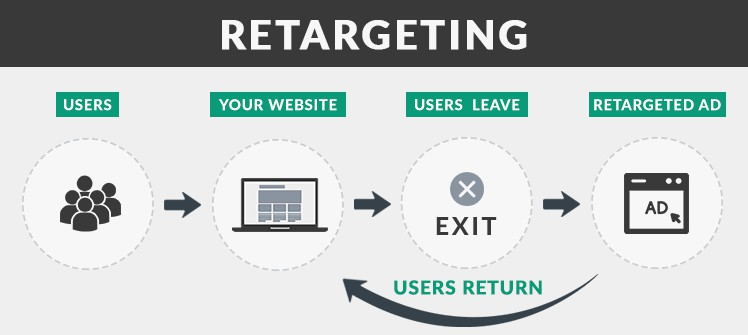
<small><center>이미지 출처: <a href="https://wenowonline.com/retargeting-get-back-your-visitors.html">링크</a></center></small>

**10. 중급반 수강생과 입문반 수강생의 설문조사 패턴 비교하기**

가장 먼저 할 일은 설문조사(```surveys```) 테이블을 분석하는 것입니다. 설문조사 데이터에서 중급반 수강생과 입문반 수강생의 설문 조사 패턴을 분석하면, 1) 비슷한 패턴으로 설문조사를 진행하였지만, 2) 아직 수강 신청을 하지 않은 예비 수강생을 찾아낼 수 있습니다. 이를 위해 입문반 수강생, 그리고 중급반 수강생들이 각 설문 문항마다 답변을 선택한 수강생의 비율을 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

PS) 이 때 중복 설문이 있다면 가장 마지막 설문조사 결과만 반영해야 합니다.

<table border="1" class="dataframe" style="float: left;">
	<thead>
		<tr style="text-align: right;">
			<th></th>
			<th>신청수업</th>
			<th>question_id</th>
			<th>a1</th>
			<th>a2</th>
			<th>a3</th>
			<th>a4</th>
			<th>a5</th>
			<th>a6</th>
			<th>a7</th>
			<th>a8</th>
			<th>a9</th>
			<th>a10</th>
			<th>a11</th>
			<th>a12</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th>0</th>
			<td>입문반</td>
			<td>1</td>
			<td>0.326241</td>
			<td>0.106383</td>
			<td>0.248227</td>
			<td>0.102837</td>
			<td>0.216312</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>1</th>
			<td>입문반</td>
			<td>2</td>
			<td>0.477193</td>
			<td>0.284211</td>
			<td>0.098246</td>
			<td>0.140351</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>2</th>
			<td>입문반</td>
			<td>3</td>
			<td>0.344948</td>
			<td>0.299652</td>
			<td>0.163763</td>
			<td>0.425087</td>
			<td>0.278746</td>
			<td>0.226481</td>
			<td>0.142857</td>
			<td>0.445993</td>
			<td>0.087108</td>
			<td>0.156794</td>
			<td>0.358885</td>
			<td>0.139373</td>
		</tr>
		<tr>
			<th>3</th>
			<td>입문반</td>
			<td>4</td>
			<td>0.093750</td>
			<td>0.677083</td>
			<td>0.225694</td>
			<td>0.003472</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>4</th>
			<td>입문반</td>
			<td>5</td>
			<td>0.098305</td>
			<td>0.183051</td>
			<td>0.372881</td>
			<td>0.342373</td>
			<td>0.003390</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>5</th>
			<td>입문반</td>
			<td>6</td>
			<td>0.192171</td>
			<td>0.238434</td>
			<td>0.466192</td>
			<td>0.412811</td>
			<td>0.533808</td>
			<td>0.466192</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>6</th>
			<td>입문반</td>
			<td>7</td>
			<td>0.729537</td>
			<td>0.270463</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>7</th>
			<td>중급반</td>
			<td>1</td>
			<td>0.270270</td>
			<td>0.162162</td>
			<td>0.216216</td>
			<td>0.189189</td>
			<td>0.162162</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>8</th>
			<td>중급반</td>
			<td>2</td>
			<td>0.428571</td>
			<td>0.285714</td>
			<td>0.095238</td>
			<td>0.190476</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>9</th>
			<td>중급반</td>
			<td>3</td>
			<td>0.552632</td>
			<td>0.184211</td>
			<td>0.157895</td>
			<td>0.263158</td>
			<td>0.236842</td>
			<td>0.421053</td>
			<td>0.157895</td>
			<td>0.473684</td>
			<td>0.026316</td>
			<td>0.105263</td>
			<td>0.368421</td>
			<td>0.105263</td>
		</tr>
		<tr>
			<th>10</th>
			<td>중급반</td>
			<td>4</td>
			<td>0.097561</td>
			<td>0.560976</td>
			<td>0.317073</td>
			<td>0.024390</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>11</th>
			<td>중급반</td>
			<td>5</td>
			<td>0.108108</td>
			<td>0.135135</td>
			<td>0.297297</td>
			<td>0.459459</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>12</th>
			<td>중급반</td>
			<td>6</td>
			<td>0.214286</td>
			<td>0.261905</td>
			<td>0.476190</td>
			<td>0.452381</td>
			<td>0.452381</td>
			<td>0.404762</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
		<tr>
			<th>13</th>
			<td>중급반</td>
			<td>7</td>
			<td>0.684211</td>
			<td>0.315789</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
			<td>0.000000</td>
		</tr>
	</tbody>
</table>

In [105]:
query = """ SELECT 신청수업, question_id, AVG(a1) AS 'a1', AVG(a2) AS 'a2', AVG(a3) AS 'a3', AVG(a4) AS a4, 
                        AVG(a5) AS 'a5', AVG(a6) AS 'a6', AVG(a7) AS 'a7', AVG(a8) AS 'a8',
                        AVG(a9) AS 'a9',AVG(a10) AS 'a10',AVG(a11) AS 'a11',AVG(a12) AS 'a12'
                FROM

                    (SELECT DISTINCT SUBSTR(신청수업,1 , 3) AS '신청수업', question_id, 
                        CAST(CASE 
                            WHEN answer1_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a1,
                        CAST(CASE 
                            WHEN answer2_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a2,
                        CAST(CASE 
                            WHEN answer3_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a3,
                        CAST(CASE 
                            WHEN answer4_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a4,
                        CAST(CASE 
                            WHEN answer5_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a5,
                        CAST(CASE 
                            WHEN answer6_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a6,
                        CAST(CASE 
                            WHEN answer7_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a7,
                        CAST(CASE 
                            WHEN answer8_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a8,
                        CAST(CASE 
                            WHEN answer9_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a9,
                        CAST(CASE 
                            WHEN answer10_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a10,
                        CAST(CASE 
                            WHEN answer11_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a11,
                        CAST(CASE 
                            WHEN answer12_selected = 't' THEN 1
                            ELSE 0
                            END AS FLOAT) AS a12,
                        user_id, updated_at
                        
                        FROM


                            (SELECT DISTINCT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                        WHERE 신청수업 LIKE '입문반%' OR 신청수업 LIKE '중급반%'
                        
                        )
                GROUP BY 신청수업, question_id
                ORDER BY 신청수업 ASC, question_id ASC, updated_at DESC


"""

pd.read_sql(query, connection)

,신청수업,question_id,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12
0,입문반,1,0.321942,0.122302,0.273381,0.097122,0.185252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,입문반,2,0.482332,0.272085,0.104240,0.141343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,입문반,3,0.369888,0.336431,0.187732,0.420074,0.276952,0.217472,0.133829,0.431227,0.102230,0.169145,0.366171,0.098513
3,입문반,4,0.095819,0.637631,0.259582,0.006969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,입문반,5,0.100365,0.155109,0.368613,0.375912,0.007299,0.003650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,입문반,6,0.230769,0.258242,0.492674,0.432234,0.542125,0.446886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,입문반,7,0.743494,0.256506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,중급반,1,0.267442,0.104651,0.267442,0.244186,0.116279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,중급반,2,0.431818,0.261364,0.102273,0.204545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,중급반,3,0.482759,0.310345,0.183908,0.310345,0.218391,0.321839,0.126437,0.459770,0.034483,0.126437,0.333333,0.080460


**11. 설문조사를 완료한 입문반 수강생 중에서 중급반 수강생과 설문조사 패턴이 유사한 수강생 선별하기**

위 설문조사 내역에서, 1) 입문반 수강생 중, 2) 중급반 수강생과 유사한 설문조사 패턴을 보이고 있으나, 3) 아직 중급반을 구매하지 않았다면 높은 확률로 중급반을 구매할 가능성이 높을 것으로 보입니다. 그로쓰팀은 이 분들을 대상으로 중급반 마감 임박 이메일과 리타게팅 광고를 집행하고자 합니다.

패턴을 분석해 보니, 중급반 수강생은 다음과 같은 설문조사 패턴을 보이고 있습니다.

1. 입문반 수강생에 비해 1번 질문에서 2번, 4번 답변을 많이 선택하며,
2. 또한 4번 질문에서 3번, 4번 답변을 많이 선택하고 있습니다.

그러므로 위와 같은 답변을 하는 수강생을 리스트업해주세요. 총 109명의 수강생이 존재하며, 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
	<thead>
		<tr style="text-align: right;">
			<th></th>
			<th>user_id</th>
			<th>이름</th>
			<th>이메일</th>
			<th>연락처</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th>0</th>
			<td>bkdau5vaxyps</td>
			<td>정채율</td>
			<td>lcl802oy6qo3@dsschool.co.kr</td>
			<td>010-6717-8605</td>
		</tr>
		<tr>
			<th>1</th>
			<td>4wxzloyf9xur</td>
			<td>장연호</td>
			<td>t1vvdt7rdaj1@dsschool.co.kr</td>
			<td>010-1114-3146</td>
		</tr>
		<tr>
			<th>2</th>
			<td>mbuteyfhbh6n</td>
			<td>정한율</td>
			<td>21rj8o7pzvjb@dsschool.co.kr</td>
			<td>010-0485-4247</td>
		</tr>
		<tr>
			<th>3</th>
			<td>bb0vxkinc4ls</td>
			<td>한진호</td>
			<td>whc45geel8e7@dsschool.co.kr</td>
			<td>01043846647</td>
		</tr>
		<tr>
			<th>4</th>
			<td>t9l3rw1oycl5</td>
			<td>허진혁</td>
			<td>dq5gul9hphqe@dsschool.co.kr</td>
			<td>010-8770-3658</td>
		</tr>
	</tbody>
</table>

In [118]:
query = """  SELECT DISTINCT *
                FROM


                    (SELECT DISTINCT user_id, 이름, 이메일, 연락처 
                            FROM

                            (SELECT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                            WHERE question_id = 1 AND (answer2_selected = 't' OR answer4_selected = 't') AND 신청수업 LIKE '입문반%'
                    UNION
                        SELECT DISTINCT user_id, 이름, 이메일, 연락처
                            FROM (SELECT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                            WHERE question_id = 4 AND (answer3_selected = 't' OR answer4_selected = 't') AND 신청수업 LIKE '입문반%')
               


"""

pd.read_sql(query, connection)

,user_id,이름,이메일,연락처
0,03tcsneidv8k,전수애,f7oj2fv16cic@dsschool.co.kr,010-3882-6481
1,0adnlpikcjdt,장동우,syag3yfg652n@dsschool.co.kr,01061052408
2,0fyr6hfskt8u,이지수,17dy0444bqpa@dsschool.co.kr,01007262675
3,0xym62vhs24u,류승윤,ndu7muig11y8@dsschool.co.kr,01022451265
4,1f85q65gr09o,임인규,mp8ywxr63a16@dsschool.co.kr,01080080012
...,...,...,...,...
178,z56qxjfw48de,한윤 채,2xu2s4qvc5si@dsschool.co.kr,010-3643-2513
179,z7n47d3m686w,전원영,fps2bmasergw@dsschool.co.kr,01040262664
180,zp6tx0ncffxw,전성수,z1bvoqh524qv@dsschool.co.kr,010-7830-8030
181,ztobkop3v931,배지영,3falgj12jxdv@dsschool.co.kr,01044046853


In [123]:
query = """  SELECT DISTINCT *
                FROM


                    (SELECT DISTINCT user_id, 이름, 이메일, 연락처 
                            FROM

                            (SELECT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                            WHERE question_id = 1 AND (answer2_selected = 't' OR answer4_selected = 't') AND 신청수업 LIKE '입문반%'
                    INTERSECT
                        SELECT DISTINCT user_id, 이름, 이메일, 연락처
                            FROM (SELECT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                            WHERE question_id = 4 AND (answer3_selected = 't' OR answer4_selected = 't') AND 신청수업 LIKE '입문반%')
               


"""

pd.read_sql(query, connection)

,user_id,이름,이메일,연락처
0,0xym62vhs24u,류승윤,ndu7muig11y8@dsschool.co.kr,01022451265
1,1nct5m9mx80e,류솔비,2cyjl0ncl6mr@dsschool.co.kr,01080138703
2,3ep6cygusz9t,장도율,xa124vzht9p4@dsschool.co.kr,010-5637-7615
3,68ak1q9ibsk3,문서우,q3q5hmudvnhe@dsschool.co.kr,01034470518
4,76vsyyc3exqe,허태영,633oppp7dpr5@dsschool.co.kr,01057863813
5,9o02g9p99h1d,정동예,7elvv3wcsuuf@dsschool.co.kr,010-5308-8475
6,9pu1n6hrvffb,안지빈,9ikp0yjplenw@dsschool.co.kr,010-2627-4455
7,a56p61i64mid,장효성,xr7f4fyvkpoj@dsschool.co.kr,01068620373
8,bf1igr9hdif0,배동현,02871gadklkr@dsschool.co.kr,01058234743
9,bz8uqvjlbo06,허윤후,v6hgctl6y2oc@dsschool.co.kr,010-8868-5814


**12. 11번 내용에서 중급반을 이미 수강한 분들을 제외하기**

9번 문제와 마찬가지입니다. 11번 문제에서, 이미 중급반을 수강신청한 분들을 대상으로는 중급반 홍보 이메일이나 리타게팅 광고를 집행할 필요가 없습니다. 그렇기 때문에 위 결과에서 중급반을 이미 수강 신청했거나 수료한 분들은 제거해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
	<thead>
		<tr style="text-align: right;">
			<th></th>
			<th>user_id</th>
			<th>이름</th>
			<th>이메일</th>
			<th>연락처</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th>0</th>
			<td>4af1ceubx834</td>
			<td>황지수</td>
			<td>7ram42pp4czn@dsschool.co.kr</td>
			<td>010-0724-3242</td>
		</tr>
		<tr>
			<th>1</th>
			<td>t9l3rw1oycl5</td>
			<td>허진혁</td>
			<td>dq5gul9hphqe@dsschool.co.kr</td>
			<td>010-8770-3658</td>
		</tr>
		<tr>
			<th>2</th>
			<td>26evrqzbt14s</td>
			<td>김도현</td>
			<td>zntizqd3t6st@dsschool.co.kr</td>
			<td>010-8103-3122</td>
		</tr>
		<tr>
			<th>3</th>
			<td>n94mq3yqwwqf</td>
			<td>최채현</td>
			<td>d090ubf2epql@dsschool.co.kr</td>
			<td>010-0385-2038</td>
		</tr>
		<tr>
			<th>4</th>
			<td>bf1igr9hdif0</td>
			<td>배동현</td>
			<td>02871gadklkr@dsschool.co.kr</td>
			<td>01058234743</td>
		</tr>
	</tbody>
</table>

In [119]:
query = """  SELECT DISTINCT *
                FROM


                    (SELECT DISTINCT user_id, 이름, 이메일, 연락처 
                            FROM

                            (SELECT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                            WHERE question_id = 1 AND (answer2_selected = 't' OR answer4_selected = 't') AND 신청수업 LIKE '입문반%'
                    UNION
                        SELECT DISTINCT user_id, 이름, 이메일, 연락처
                            FROM (SELECT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                            WHERE question_id = 4 AND (answer3_selected = 't' OR answer4_selected = 't') AND 신청수업 LIKE '입문반%')
               EXCEPT 
                   SELECT DISTINCT *
                       FROM
                           (SELECT DISTINCT user_id, 이름, 이메일, 연락처 
                            FROM

                            (SELECT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                            WHERE 신청수업 LIKE '중급반%')


"""

pd.read_sql(query, connection)

,user_id,이름,이메일,연락처
0,03tcsneidv8k,전수애,f7oj2fv16cic@dsschool.co.kr,010-3882-6481
1,0adnlpikcjdt,장동우,syag3yfg652n@dsschool.co.kr,01061052408
2,0fyr6hfskt8u,이지수,17dy0444bqpa@dsschool.co.kr,01007262675
3,0xym62vhs24u,류승윤,ndu7muig11y8@dsschool.co.kr,01022451265
4,1f85q65gr09o,임인규,mp8ywxr63a16@dsschool.co.kr,01080080012
...,...,...,...,...
161,yw2t9hrxwtk5,배서주,d666rkxt2avz@dsschool.co.kr,010-0604-0273
162,z56qxjfw48de,한윤 채,2xu2s4qvc5si@dsschool.co.kr,010-3643-2513
163,zp6tx0ncffxw,전성수,z1bvoqh524qv@dsschool.co.kr,010-7830-8030
164,ztobkop3v931,배지영,3falgj12jxdv@dsschool.co.kr,01044046853


In [124]:
query = """  SELECT DISTINCT *
                FROM


                    (SELECT DISTINCT user_id, 이름, 이메일, 연락처 
                            FROM

                            (SELECT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                            WHERE question_id = 1 AND (answer2_selected = 't' OR answer4_selected = 't') AND 신청수업 LIKE '입문반%'
                    INTERSECT
                        SELECT DISTINCT user_id, 이름, 이메일, 연락처
                            FROM (SELECT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                            WHERE question_id = 4 AND (answer3_selected = 't' OR answer4_selected = 't') AND 신청수업 LIKE '입문반%')
               EXCEPT 
                   SELECT DISTINCT *
                       FROM
                           (SELECT DISTINCT user_id, 이름, 이메일, 연락처 
                            FROM

                            (SELECT *
                                FROM payments
                                INNER JOIN surveys ON payments.user_id = surveys.user_id)
                            WHERE 신청수업 LIKE '중급반%')



"""

pd.read_sql(query, connection)

,user_id,이름,이메일,연락처
0,0xym62vhs24u,류승윤,ndu7muig11y8@dsschool.co.kr,01022451265
1,3ep6cygusz9t,장도율,xa124vzht9p4@dsschool.co.kr,010-5637-7615
2,68ak1q9ibsk3,문서우,q3q5hmudvnhe@dsschool.co.kr,01034470518
3,76vsyyc3exqe,허태영,633oppp7dpr5@dsschool.co.kr,01057863813
4,9o02g9p99h1d,정동예,7elvv3wcsuuf@dsschool.co.kr,010-5308-8475
5,9pu1n6hrvffb,안지빈,9ikp0yjplenw@dsschool.co.kr,010-2627-4455
6,bf1igr9hdif0,배동현,02871gadklkr@dsschool.co.kr,01058234743
7,bz8uqvjlbo06,허윤후,v6hgctl6y2oc@dsschool.co.kr,010-8868-5814
8,emkla142k9x2,양윤진,zpssdjt3xwsg@dsschool.co.kr,010-8480-7173
9,f1mossggkkar,황민규,4r7vu64i8ugo@dsschool.co.kr,010-4651-3766


### 코호트 분석(Cohort Analysis)

데이터 분석에서 자주 쓰이는 또 다른 기법 중에 하나는 코호트 분석(Cohort Analysis, 동일 집단 분석)입니다.

여기서 코호트(Cohort)란 특정 기간동안 공통된 특성이나 경험을 갖는 사용자 집단을 의미합니다. 예를 들어, 서울에 사는 30대 초반 남성이 2019년 1월 1일에 인스타그램 광고를 통해 DS스쿨 홈페이지를 방문해 가입하고 다음날 입문반 수업을 결제했다면, 이 사용자는 다음과 같은 코호트 그룹에 속한다고 볼 수 있습니다.

* 서울(지역) 코호트
* 30대(연령) 코호트
* 남성(성별) 코호트
* 2019-01-01 가입(가입일) 코호트
* 인스타그램 광고 유입(트래픽) 코호트
* 2019-01-02 첫구매(첫구매일) 코호트
* 입문반 구매(구매 제품) 코호트

코호트 분석에서는 주로 시간의 흐름에 따른 지표 분석을 하는데 유용합니다. 가령 특정 서비스의 리텐션(retention, 잔존율)을 특정하고 싶을 때, 코호트 분석을 통해 측정하면 시간이 경과함에 따라 이 지표의 변화를 확인할 수 있습니다.



코호트 분석으로 측정하는 중요한 지표(metric) 중 하나로 **'리텐션(retention, 잔존율)'** 이 있습니다. 리텐션은 특정 기간의 코호트가 시간이 경과함에 따라 비즈니스에 얼마나 남아 있는지를 측정하는 지표입니다. 특정 시간 경과 후 남아 있는 사용자 수를 코호트 내 전체 사용자 수로 나누어 구할 수 있습니다.

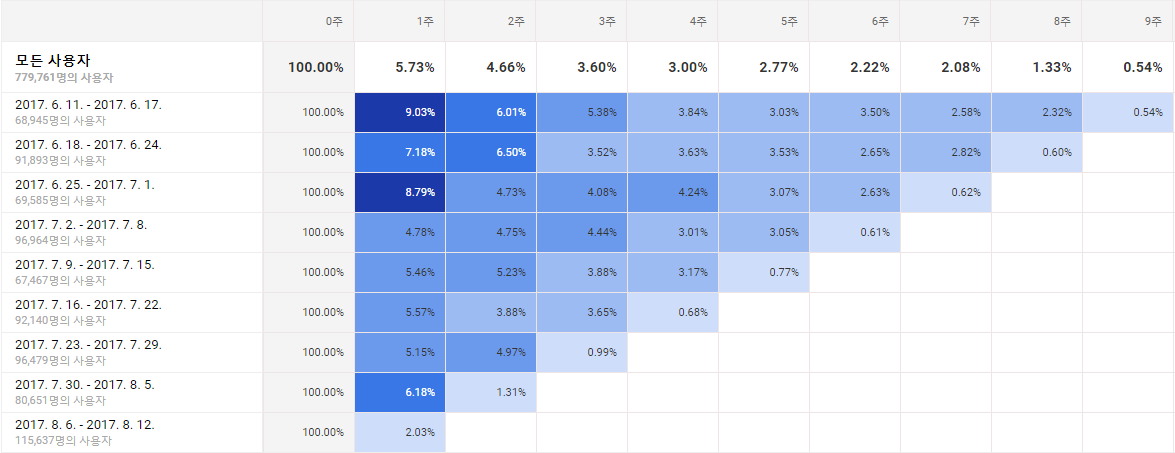

이미지 출처: [링크](https://analyticsmarketing.co.kr/digital-analytics/google-analytics/1527/)

**13. 최초결제월을 기준으로 cohort를 정의하고 cohort 별 유저 수 구하기**

코호트 분석은 다소 난이도가 있기 때문에, 문제를 하나하나 나눠서 해결해보겠습니다. 가장 먼저 하고 싶은 일은, 수강생의 최초 결제 월(month)을 기준으로 첫 결제를 한 수강생 수를 구해주세요. 상세한 예시를 들자면 다음과 같습니다.

  * A라는 수강생이 2017년 10월 27일에 입문반을 수강신청 했다고 가정하면, 이 수강생의 최초 결제 월은 2017년 10월로 간주합니다.
  * B라는 수강생이 2017년 8월 3일에 입문반을 수강신청 하고, 2017년 11월 19일에 중급반을 수강신청했다고 가정하면, 이 수강생의 최초 결제 월은 2017년 8월로 간주합니다.

위와 같은 방식으로 각 수강생마다 최초 결제 월(month)을 구한 뒤, 최초 결제 월별 수강 신청한 수강생 수를 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
	<thead>
		<tr style="text-align: right;">
			<th></th>
			<th>cohort_date</th>
			<th>cohort_cnt</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th>0</th>
			<td>2017-07-01</td>
			<td>4</td>
		</tr>
		<tr>
			<th>1</th>
			<td>2017-08-01</td>
			<td>25</td>
		</tr>
		<tr>
			<th>2</th>
			<td>2017-09-01</td>
			<td>67</td>
		</tr>
		<tr>
			<th>3</th>
			<td>2017-10-01</td>
			<td>137</td>
		</tr>
		<tr>
			<th>4</th>
			<td>2017-11-01</td>
			<td>139</td>
		</tr>
		<tr>
			<th>5</th>
			<td>2017-12-01</td>
			<td>95</td>
		</tr>
		<tr>
			<th>6</th>
			<td>2018-01-01</td>
			<td>150</td>
		</tr>
	</tbody>
</table>

In [133]:
query = """ SELECT cohort_date, COUNT(DISTINCT user_id) AS cohort_cnt
                FROM 


                    (SELECT MIN(날짜) AS cohort_date ,MAX(날짜), user_id
                        FROM


                                (SELECT DISTINCT user_id, 이름, 연락처, STRFTIME('%Y-%m-01',신청날짜) AS 날짜
                                    FROM payments
                                    WHERE 상태 = '결제 완료')
                        GROUP BY user_id)
                GROUP BY cohort_date
"""

pd.read_sql(query, connection)

,cohort_date,cohort_cnt
0,2017-07-01,4
1,2017-08-01,25
2,2017-09-01,67
3,2017-10-01,139
4,2017-11-01,141
5,2017-12-01,101
6,2018-01-01,156


**14. 최초 결제 월과 실제 결제 월의 차이 별 유저 수를 구합시다.**

이 다음에 하고 싶은 내용은 앞서 구한 최초 결제 월(month)과, 실제 결제 월(month)의 차이를 구하는 것입니다. 가령 예시를 들자면 다음과 같습니다.

  * A라는 수강생이 2017년 10월 27일에 입문반을 수강신청 했다고 가정하면,
    * 이 수강생의 최초 결제 월은 2017년 10월, 실제 결제 월 역시 2017년 10월로 가정합니다.
  * B라는 수강생이 2017년 8월 3일에 입문반을 수강신청 하고, 2017년 11월 19일에 중급반을 수강신청했다고 가정하면,
    * 첫 번째 수업(입문반)의 최초 결제 월은 2017년 8월, 실제 결제 월 역시 2017년 8월로 가정합니다.
    * 다만, 두 번째 수업(중급반)의 최초 결제 월은 2017년 8월, 실제 결제 월은 2017년 11월로 가정합니다.


이 차이를 알 수 있어야 코호트 분석을 할 수 있습니다.

또한 구체적인 통계치를 구하기 위해 최초 결제 월(month)과 실제 결제 월(month)의 차이에 따른 사용자 수를 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
	<thead>
		<tr style="text-align: right;">
			<th></th>
			<th>cohort_date</th>
			<th>activity_date</th>
			<th>month_gap</th>
			<th>activity_cnt</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th>0</th>
			<td>2017-07-01</td>
			<td>2017-07-01</td>
			<td>0</td>
			<td>4</td>
		</tr>
		<tr>
			<th>1</th>
			<td>2017-07-01</td>
			<td>2017-09-01</td>
			<td>2</td>
			<td>1</td>
		</tr>
		<tr>
			<th>2</th>
			<td>2017-08-01</td>
			<td>2017-08-01</td>
			<td>0</td>
			<td>25</td>
		</tr>
		<tr>
			<th>3</th>
			<td>2017-08-01</td>
			<td>2017-09-01</td>
			<td>1</td>
			<td>2</td>
		</tr>
		<tr>
			<th>4</th>
			<td>2017-08-01</td>
			<td>2017-11-01</td>
			<td>3</td>
			<td>1</td>
		</tr>
		<tr>
			<th>5</th>
			<td>2017-08-01</td>
			<td>2017-12-01</td>
			<td>4</td>
			<td>1</td>
		</tr>
		<tr>
			<th>6</th>
			<td>2017-09-01</td>
			<td>2017-09-01</td>
			<td>0</td>
			<td>67</td>
		</tr>
		<tr>
			<th>7</th>
			<td>2017-09-01</td>
			<td>2017-10-01</td>
			<td>1</td>
			<td>15</td>
		</tr>
		<tr>
			<th>8</th>
			<td>2017-09-01</td>
			<td>2017-11-01</td>
			<td>2</td>
			<td>9</td>
		</tr>
		<tr>
			<th>9</th>
			<td>2017-09-01</td>
			<td>2017-12-01</td>
			<td>3</td>
			<td>2</td>
		</tr>
		<tr>
			<th>10</th>
			<td>2017-09-01</td>
			<td>2018-01-01</td>
			<td>4</td>
			<td>1</td>
		</tr>
		<tr>
			<th>11</th>
			<td>2017-10-01</td>
			<td>2017-10-01</td>
			<td>0</td>
			<td>137</td>
		</tr>
		<tr>
			<th>12</th>
			<td>2017-10-01</td>
			<td>2017-11-01</td>
			<td>1</td>
			<td>18</td>
		</tr>
		<tr>
			<th>13</th>
			<td>2017-10-01</td>
			<td>2017-12-01</td>
			<td>2</td>
			<td>9</td>
		</tr>
		<tr>
			<th>14</th>
			<td>2017-10-01</td>
			<td>2018-01-01</td>
			<td>3</td>
			<td>4</td>
		</tr>
		<tr>
			<th>15</th>
			<td>2017-11-01</td>
			<td>2017-11-01</td>
			<td>0</td>
			<td>139</td>
		</tr>
		<tr>
			<th>16</th>
			<td>2017-11-01</td>
			<td>2017-12-01</td>
			<td>1</td>
			<td>18</td>
		</tr>
		<tr>
			<th>17</th>
			<td>2017-11-01</td>
			<td>2018-01-01</td>
			<td>2</td>
			<td>11</td>
		</tr>
		<tr>
			<th>18</th>
			<td>2017-12-01</td>
			<td>2017-12-01</td>
			<td>0</td>
			<td>95</td>
		</tr>
		<tr>
			<th>19</th>
			<td>2017-12-01</td>
			<td>2018-01-01</td>
			<td>1</td>
			<td>17</td>
		</tr>
		<tr>
			<th>20</th>
			<td>2018-01-01</td>
			<td>2018-01-01</td>
			<td>0</td>
			<td>150</td>
		</tr>
	</tbody>
</table>

팁) 두 날짜 간 차이를 구하는 함수는 SQLite에서는 [JULIANDAY](https://araikuma.tistory.com/744)라는 함수를 사용합니다. 정확히는 이 함수를 활용하여 날짜 차이를 일로 계산한 뒤, 이를 30으로 나눈 값을 내림하여 월의 차를 구해야 합니다.

```
SELECT cast((JULIANDAY('2017-12-01') - JULIANDAY('2017-11-01'))/30 AS int)
>>> 1
```

MySQL에서 비슷한 기능을 하는 함수로는 [DATEDIFF](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_datediff)와 [TIMESTAMPDIFF](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff)가 있습니다.



In [135]:
query = """ SELECT cohort_date, activity_date, CAST((JULIANDAY(activity_date)-JULIANDAY(cohort_date))/30 AS INT) AS month_gap , COUNT(DISTINCT user_id) AS activity_cnt
                FROM 


                    (SELECT MIN(날짜) AS cohort_date ,MAX(날짜) AS activity_date, user_id
                        FROM


                                (SELECT DISTINCT user_id, 이름, 연락처, STRFTIME('%Y-%m-01',신청날짜) AS 날짜
                                    FROM payments
                                    WHERE 상태 = '결제 완료')
                        GROUP BY user_id)
                GROUP BY cohort_date, activity_date
"""

pd.read_sql(query, connection)

,cohort_date,activity_date,month_gap,activity_cnt
0,2017-07-01,2017-07-01,0,3
1,2017-07-01,2017-09-01,2,1
2,2017-08-01,2017-08-01,0,22
3,2017-08-01,2017-09-01,1,2
4,2017-08-01,2017-11-01,3,1
5,2017-09-01,2017-09-01,0,46
6,2017-09-01,2017-10-01,1,11
7,2017-09-01,2017-11-01,2,6
8,2017-09-01,2017-12-01,3,2
9,2017-09-01,2018-01-01,4,2


**15. 위 내용을 조합하여, 월별 잔존율(Monthly retention)을 코호트 분석으로 구하기**

이제 마지막 하나가 남았습니다. 이제 위 내용을 활용하면, DS스쿨의 월별 잔존율(Monthly retention)을 구할 수 있을 것입니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
  <thead>
    <tr style="text-align: right;">
      <th>month_gap</th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
    </tr>
    <tr>
      <th>cohort_date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2017-07-01</th>
      <td>100</td>
      <td>0.00</td>
      <td>25.00</td>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>2017-08-01</th>
      <td>100</td>
      <td>12.00</td>
      <td>0.00</td>
      <td>4.00</td>
      <td>4.00</td>
    </tr>
    <tr>
      <th>2017-09-01</th>
      <td>100</td>
      <td>17.91</td>
      <td>13.43</td>
      <td>2.99</td>
      <td>2.99</td>
    </tr>
    <tr>
      <th>2017-10-01</th>
      <td>100</td>
      <td>17.91</td>
      <td>8.21</td>
      <td>5.22</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>2017-11-01</th>
      <td>100</td>
      <td>14.29</td>
      <td>9.02</td>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>2017-12-01</th>
      <td>100</td>
      <td>10.64</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>2018-01-01</th>
      <td>100</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
  </tbody>
</table>

In [145]:
query = """ SELECT cohort_date, activity_date, CAST((JULIANDAY(activity_date)-JULIANDAY(cohort_date))/30 AS INT) AS month_gap , COUNT(DISTINCT user_id) AS activity_cnt
                FROM 


                    (SELECT MIN(날짜) AS cohort_date ,MAX(날짜) AS activity_date, user_id
                        FROM


                                (SELECT DISTINCT user_id, 이름, 연락처, STRFTIME('%Y-%m-01',신청날짜) AS 날짜
                                    FROM payments
                                    WHERE 상태 = '결제 완료')
                        GROUP BY user_id)
                GROUP BY cohort_date, activity_date
"""

table5 = pd.read_sql(query, connection)

table6 = pd.pivot_table(table5, index = "cohort_date", values = "activity_cnt", columns = "month_gap", fill_value = 0)

round((table6.T/table6[0]).T*100, 2)

month_gap,0,1,2,3,4
cohort_date,,,,,
2017-07-01,100.0,0.00,33.33,0.00,0.00
2017-08-01,100.0,9.09,0.00,4.55,0.00
2017-09-01,100.0,23.91,13.04,4.35,4.35
2017-10-01,100.0,14.16,5.31,3.54,0.00
2017-11-01,100.0,12.71,6.78,0.00,0.00
2017-12-01,100.0,17.44,0.00,0.00,0.00
2018-01-01,100.0,0.00,0.00,0.00,0.00


## 제출

과제를 다 끝내셨으면 http://bit.ly/ds-assignment 에서 안내에 따라 과제를 제출하여 주세요! 과제를 제출해주시면 솔루션과 검토 결과를 드립니다. 오프라인 수업의 경우 과제를 제출하지 않으시더라도 솔루션은 다음 수업 시간에 제공해드립니다.

수업이나 과제 관련 질문, 수료증 문의 등은 담당 튜터(조교)에게 문의 주세요. 영수증 발급 등의 문의는 support@dsschool.co.kr 로 메일 주시면 담당자분이 응대해주실 겁니다. 기타 궁금한 사항은 슬랙으로 문의 주세요!